# Regression with MLP in Keras using RVE engineering coefficients
Ehsan Ghane March 28 2022

In [3]:
import numpy as np
import pandas as pd

In [4]:
pwd

'C:\\Users\\xghaeh\\Documents\\Ehsan code'

# input in the microscale
EM : elastic modulus of matrix \
muM : Poisson ration of matrix\
EF : Elastic modulus of fibre\
nuF : Poisson ratio of fiber\
phiF : fiber volume fraction inside the UD yarns
\
E11 [MPa]: elastic tensile modulus of the UD RVE
nu12 : shear poisson ration of the UD RVE in 1-2 plane
\
Ex [GPa]: in-plane tensile elastic modulus of the woven RVE
nu_xy : in-plane poisson ration of the woven RVE


In [5]:
# input for dry properties and hemogenised properties of UD composite for the yarns
df = pd.read_excel("ElasEngCoefDataSet.xlsx",
                  sheet_name='400without_header',
                  header=None,
                  names=[ "EM", "nuM", "EF", "nuF", 
                        "E11", "E22", "E33", 
                         "nu12", "nu21", "nu13", "nu31", "nu23", "nu32", 
                         "G12", "G23", "G13","phiF",
                        "Ex", "Ey", "Gxy", "nu_xy"])
#__["EM", "nuM", "EF", "nuF","phiF"]:
#_________input parameters of the microscopic model generated from the Sobol sequence technique
#__["E11", "E22", "E33","nu12", "nu21", "nu13", "nu31", "nu23", "nu32","G12", "G23", "G13"]:
#_________UD RVE elastic properties computed numerically in Digimat sofware
#__["Ex", "Ey", "Gxy", "nu_xy"]:
#_________Woven RVE elastic response computed analytically based on Ghane-2020 

# output in the mesoscale from a CSV file computetd from FE modeling of woven RVEs
Df = pd.read_csv('WovenMesoscaleElasticModule.csv',
                nrows =400)
Df = Df.drop( 'Unnamed: 0' , axis = 1)
#__['E1', 'v12', 'v13', 'E2', 'v21', 'v23', 'E3', 'v31', 'v32', 'G23','G31', 'G12', 'CTE_1', 'CTE_2', 'CTE_3']
#_________Woven RVE elastic response computed by FE in TexGen based on the aformentioned hemogenized UD properties

In [6]:
df.tail()

,EM,nuM,EF,nuF,E11,E22,E33,nu12,nu21,nu13,...,nu23,nu32,G12,G23,G13,phiF,Ex,Ey,Gxy,nu_xy
395,5594.726562,0.274844,512985.742188,0.232422,277883.30,20446.33,20170.67,0.245850,0.018089,0.246130,...,0.309010,0.304840,8954.333,8115.000,8817.667,0.546680,57.760847,48.846884,4.223481,0.060360
396,8844.726562,0.394844,154435.742188,0.332422,66103.33,22533.67,22056.67,0.365067,0.124443,0.367000,...,0.487067,0.476733,7465.000,7396.000,7178.000,0.396680,25.696487,23.102565,3.528388,0.247939
397,7219.726562,0.334844,333710.742188,0.282422,112250.00,15432.00,14943.67,0.312213,0.042923,0.314077,...,0.426367,0.412867,5717.333,5199.000,5496.667,0.321680,30.449141,26.234713,2.697591,0.132011
398,3969.726562,0.454844,692260.742188,0.382422,324016.70,20472.00,20159.67,0.416300,0.026302,0.417967,...,0.656067,0.646067,4362.000,6362.667,4442.667,0.471680,50.299519,45.155406,2.075039,0.088725
399,4172.851562,0.327344,580213.867188,0.363672,326996.70,18228.33,19327.33,0.351867,0.019615,0.352933,...,0.328520,0.348333,6957.000,6969.333,7299.667,0.574805,59.040956,50.624972,3.288269,0.061935


In [7]:
Df.columns

Index(['E1', 'v12', 'v13', 'E2', 'v21', 'v23', 'E3', 'v31', 'v32', 'G23',
       'G31', 'G12', 'CTE_1', 'CTE_2', 'CTE_3'],
      dtype='object')

In [8]:
Features = df[['phiF','EM','nuM','EF','nuF']]
# to_numpy(np.float32)any
Output = Df[['E1','E3','v12','v23','G12','G23']]
#Output_analytical = df[['Ex','Ey','Gxy','nu_xy']]
# E22 is almost equal to E11 

In [9]:
Features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
phiF,400.0,0.450242,0.086614,0.301172,0.375879,0.450586,0.525293,0.599414
EM,400.0,6742.033691,1876.179494,3525.390625,5121.826172,6743.652344,8365.478516,9987.304688
nuM,400.0,0.370137,0.069138,0.250937,0.310703,0.369766,0.429648,0.489531
EF,400.0,429108.151855,206642.417684,71801.171875,250375.878906,428950.585938,605774.560547,784699.414062
nuF,400.0,0.300081,0.057675,0.200391,0.250293,0.300195,0.350098,0.399219


In [10]:
Output.describe().transpose()
#G13 is found equal to G12
#E33 is also found almost equal to E22

,count,mean,std,min,25%,50%,75%,max
E1,400.0,53958.503500,23055.326353,4896.4000,35967.250000,53384.00000,69616.750000,118180.0000
E3,400.0,16982.306250,8043.571359,4896.4000,11678.250000,15091.50000,20492.250000,56392.0000
v12,400.0,0.169063,0.041399,0.1120,0.141125,0.16005,0.188675,0.4382
v23,400.0,0.468625,0.101979,0.2997,0.383275,0.45860,0.547450,0.7072
G12,400.0,4699.856000,1500.903612,1702.3000,3548.625000,4549.70000,5701.050000,9269.2000
G23,400.0,4090.311500,1189.447436,1702.3000,3133.075000,4027.65000,4978.500000,6999.5000


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler


X_train, X_test, y_train, y_test = train_test_split(Features, Output, test_size=None , random_state=42)

scaler1 = MinMaxScaler()
#scaler2 = StandardScaler()


X_train = scaler1.fit_transform(X_train)
X_test = scaler1.transform(X_test)
y_train = scaler1.fit_transform(y_train)
y_test = scaler1.transform(y_test)


In [12]:
# description of input and output in Dataframe format: 
xx_test=pd.DataFrame(X_test,columns = ['phiF','EM','nuM','EF','nuF'])
yy_test=pd.DataFrame(y_test,columns = ['E1','E3','v12','v23','G12','G23'])

yy_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
E1,100.0,0.445336,0.201384,0.116968,0.295650,0.430531,0.579297,0.947830
E3,100.0,0.242545,0.143412,0.048963,0.140548,0.211224,0.308043,0.718442
v12,100.0,0.173500,0.135794,-0.006790,0.083488,0.148148,0.220988,0.702778
v23,100.0,0.456830,0.258233,0.026191,0.251933,0.429284,0.660763,1.016463
G12,100.0,0.399580,0.205715,0.028215,0.214209,0.409765,0.533703,0.896761
G23,100.0,0.458637,0.233993,0.036925,0.246725,0.480395,0.636945,0.953806


In [13]:
xx_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
phiF,100.0,0.481218,0.298085,0.011788,0.207269,0.462672,0.741159,0.978389
EM,100.0,0.516739,0.306764,0.001965,0.221513,0.563851,0.788802,0.994106
nuM,100.0,0.537328,0.290101,0.003929,0.344303,0.561886,0.794204,0.994106
EF,100.0,0.526326,0.287007,0.003929,0.270629,0.557957,0.755403,0.998035
nuF,100.0,0.476817,0.291057,0.021611,0.221513,0.459725,0.720530,0.996071


In [14]:
#Check validity of inputs (no NaNs or sometimes 0s).
#df.isnull().any()

In [15]:
#np.(y_test, ddof=1)

# Neural network implementation

In [16]:
import tensorflow as tf
from tensorflow import keras

# programmatic network configuration
There is a rule of thumb that helps for supervised learning problems. You can usually prevent over-fitting if you keep your number of "trainable parameters" as below:\
Nh=Ns/(α∗(Ni+No));\
Ni = number of input neurons.\
No = number of output neurons.\
Ns = number of samples in training data set.\
α = an arbitrary scaling factor usually 2-10.\
You can think of α as the effective branching factor or number of nonzero weights for each neuron. Dropout layers will bring the "effective" branching factor way down from the actual mean branching factor for your network.

You want to limit the number of free parameters in your model (its degree or number of nonzero weights) to a small portion of the degrees of freedom in your data. The degrees of freedom in your data is the number samples * degrees of freedom (dimensions) in each sample or Ns∗(Ni+No)
(assuming they're all independent). So α is a way to indicate how general you want your model to be, or how much you want to prevent overfitting.\

For an automated procedure you'd start with an α of 2 (twice as many degrees of freedom in your training data as your model) and work your way up to 10 if the error (loss) for your training dataset is significantly smaller than for your test dataset.\
Ref:https://hagan.okstate.edu/NNDesign.pdf#page=469

In [17]:
np.random.seed(42)
tf.random.set_seed(42)
#____________________________________________________________________________
model = keras.models.Sequential([
    keras.layers.Dense(64, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(6)
]) #6 output neurons represints 3D elastic properties of woven RVE ['E1','E3','v12','v23','G12','G23']

model.summary()
# After the model is created compile() is called to specify the loss function and optimizer
# The learning rate "lr" can be set after the default value = 0.01
model.compile(loss="mean_squared_error", 
              optimizer=keras.optimizers.Adam(lr=1e-5),
              metrics=[tf.keras.metrics.RootMeanSquaredError()])
#____________________________________________________________________________
history = model.fit(X_train, y_train, epochs=3000, validation_split=0.1)
            # Keras will measure the loss and the extra metrics on validation set at the end of each EPOCH
            # if performance is better on validation set than the training set >> overfitting problem or data mismatch
            # And that's it! the neural network is trained
#____________________________________________________________________________
            # Once you're satisfied with your model's validation accuracy, 
            # it's time to evaluate the model on test set
mse_test = model.evaluate(X_test, y_test)
    
            # make prediction on the first three instance of the test set, since we had not any other data:
#X_new = X_test[:3]
#y_absolute = y_test [:3]
#y_pred = model.predict(X_new)
#____________________________________________________________________________
model.save('MicroScalePredictor')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                384       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 390       
Total params: 9,094
Trainable params: 9,094
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3000
9/9 [==============================] - 0s 33ms/step - loss: 0.1525 - root_mean_squared_error: 0.3906 - val_loss: 0.1461 - val_root_mean_squared_error: 0.3823
Epoch 2/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.1510 - 

Epoch 44/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0980 - root_mean_squared_error: 0.3130 - val_loss: 0.0938 - val_root_mean_squared_error: 0.3063
Epoch 45/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0969 - root_mean_squared_error: 0.3113 - val_loss: 0.0928 - val_root_mean_squared_error: 0.3046
Epoch 46/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0958 - root_mean_squared_error: 0.3096 - val_loss: 0.0917 - val_root_mean_squared_error: 0.3028
Epoch 47/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0947 - root_mean_squared_error: 0.3078 - val_loss: 0.0906 - val_root_mean_squared_error: 0.3011
Epoch 48/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0936 - root_mean_squared_error: 0.3060 - val_loss: 0.0896 - val_root_mean_squared_error: 0.2993
Epoch 49/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0925 - root_mean_squared_error: 0.3042 - val_loss: 0.0885 - val_root_m

Epoch 92/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0522 - root_mean_squared_error: 0.2284 - val_loss: 0.0477 - val_root_mean_squared_error: 0.2183
Epoch 93/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0515 - root_mean_squared_error: 0.2269 - val_loss: 0.0469 - val_root_mean_squared_error: 0.2166
Epoch 94/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0508 - root_mean_squared_error: 0.2253 - val_loss: 0.0462 - val_root_mean_squared_error: 0.2149
Epoch 95/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0501 - root_mean_squared_error: 0.2237 - val_loss: 0.0455 - val_root_mean_squared_error: 0.2132
Epoch 96/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0494 - root_mean_squared_error: 0.2222 - val_loss: 0.0448 - val_root_mean_squared_error: 0.2116
Epoch 97/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0487 - root_mean_squared_error: 0.2207 - val_loss: 0.0441 - val_root_m

Epoch 140/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0289 - root_mean_squared_error: 0.1700 - val_loss: 0.0233 - val_root_mean_squared_error: 0.1525
Epoch 141/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0286 - root_mean_squared_error: 0.1692 - val_loss: 0.0230 - val_root_mean_squared_error: 0.1516
Epoch 142/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0284 - root_mean_squared_error: 0.1684 - val_loss: 0.0227 - val_root_mean_squared_error: 0.1506
Epoch 143/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0281 - root_mean_squared_error: 0.1676 - val_loss: 0.0224 - val_root_mean_squared_error: 0.1498
Epoch 144/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0279 - root_mean_squared_error: 0.1669 - val_loss: 0.0222 - val_root_mean_squared_error: 0.1489
Epoch 145/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0276 - root_mean_squared_error: 0.1661 - val_loss: 0.0219 - val_

Epoch 235/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0160 - root_mean_squared_error: 0.1265 - val_loss: 0.0116 - val_root_mean_squared_error: 0.1079
Epoch 236/3000
9/9 [==============================] - 0s 6ms/step - loss: 0.0159 - root_mean_squared_error: 0.1262 - val_loss: 0.0116 - val_root_mean_squared_error: 0.1076
Epoch 237/3000
9/9 [==============================] - 0s 6ms/step - loss: 0.0158 - root_mean_squared_error: 0.1258 - val_loss: 0.0115 - val_root_mean_squared_error: 0.1073
Epoch 238/3000
9/9 [==============================] - 0s 6ms/step - loss: 0.0157 - root_mean_squared_error: 0.1255 - val_loss: 0.0115 - val_root_mean_squared_error: 0.1070
Epoch 239/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0157 - root_mean_squared_error: 0.1251 - val_loss: 0.0114 - val_root_mean_squared_error: 0.1067
Epoch 240/3000
9/9 [==============================] - 0s 6ms/step - loss: 0.0156 - root_mean_squared_error: 0.1248 - val_loss: 0.0113 - val_

Epoch 330/3000
9/9 [==============================] - 0s 6ms/step - loss: 0.0091 - root_mean_squared_error: 0.0952 - val_loss: 0.0070 - val_root_mean_squared_error: 0.0834
Epoch 331/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0090 - root_mean_squared_error: 0.0949 - val_loss: 0.0069 - val_root_mean_squared_error: 0.0832
Epoch 332/3000
9/9 [==============================] - 0s 7ms/step - loss: 0.0090 - root_mean_squared_error: 0.0946 - val_loss: 0.0069 - val_root_mean_squared_error: 0.0830
Epoch 333/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0089 - root_mean_squared_error: 0.0943 - val_loss: 0.0069 - val_root_mean_squared_error: 0.0828
Epoch 334/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0088 - root_mean_squared_error: 0.0940 - val_loss: 0.0068 - val_root_mean_squared_error: 0.0826
Epoch 335/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0088 - root_mean_squared_error: 0.0937 - val_loss: 0.0068 - val_

Epoch 425/3000
9/9 [==============================] - 0s 6ms/step - loss: 0.0056 - root_mean_squared_error: 0.0745 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0684
Epoch 426/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0055 - root_mean_squared_error: 0.0744 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0683
Epoch 427/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0055 - root_mean_squared_error: 0.0743 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0682
Epoch 428/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0055 - root_mean_squared_error: 0.0741 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0681
Epoch 429/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0055 - root_mean_squared_error: 0.0740 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0680
Epoch 430/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0055 - root_mean_squared_error: 0.0739 - val_loss: 0.0046 - val_

Epoch 520/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0043 - root_mean_squared_error: 0.0656 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0604
Epoch 521/3000
9/9 [==============================] - 0s 6ms/step - loss: 0.0043 - root_mean_squared_error: 0.0656 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0604
Epoch 522/3000
9/9 [==============================] - 0s 6ms/step - loss: 0.0043 - root_mean_squared_error: 0.0655 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0602
Epoch 523/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0043 - root_mean_squared_error: 0.0654 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0602
Epoch 524/3000
9/9 [==============================] - 0s 6ms/step - loss: 0.0043 - root_mean_squared_error: 0.0653 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0602
Epoch 525/3000
9/9 [==============================] - 0s 6ms/step - loss: 0.0043 - root_mean_squared_error: 0.0653 - val_loss: 0.0036 - val_

Epoch 615/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0036 - root_mean_squared_error: 0.0598 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0538
Epoch 616/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0036 - root_mean_squared_error: 0.0598 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0538
Epoch 617/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0036 - root_mean_squared_error: 0.0597 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0537
Epoch 618/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0036 - root_mean_squared_error: 0.0597 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0536
Epoch 619/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0036 - root_mean_squared_error: 0.0596 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0536
Epoch 620/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0036 - root_mean_squared_error: 0.0596 - val_loss: 0.0029 - val_

Epoch 710/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0031 - root_mean_squared_error: 0.0555 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0491
Epoch 711/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0031 - root_mean_squared_error: 0.0555 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0490
Epoch 712/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0031 - root_mean_squared_error: 0.0555 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0490
Epoch 713/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0031 - root_mean_squared_error: 0.0554 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0489
Epoch 714/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0031 - root_mean_squared_error: 0.0554 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0489
Epoch 715/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0031 - root_mean_squared_error: 0.0553 - val_loss: 0.0024 - val_

9/9 [==============================] - 0s 6ms/step - loss: 0.0027 - root_mean_squared_error: 0.0523 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0456
Epoch 805/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0027 - root_mean_squared_error: 0.0523 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0456
Epoch 806/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0027 - root_mean_squared_error: 0.0522 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0457
Epoch 807/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0027 - root_mean_squared_error: 0.0522 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0455
Epoch 808/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0027 - root_mean_squared_error: 0.0522 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0455
Epoch 809/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0027 - root_mean_squared_error: 0.0522 - val_loss: 0.0021 - val_root_mean_squar

Epoch 852/3000
9/9 [==============================] - 0s 6ms/step - loss: 0.0026 - root_mean_squared_error: 0.0509 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0443
Epoch 853/3000
9/9 [==============================] - 0s 6ms/step - loss: 0.0026 - root_mean_squared_error: 0.0509 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0442
Epoch 854/3000
9/9 [==============================] - 0s 6ms/step - loss: 0.0026 - root_mean_squared_error: 0.0509 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0441
Epoch 855/3000
9/9 [==============================] - 0s 6ms/step - loss: 0.0026 - root_mean_squared_error: 0.0508 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0441
Epoch 856/3000
9/9 [==============================] - 0s 6ms/step - loss: 0.0026 - root_mean_squared_error: 0.0508 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0441
Epoch 857/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0026 - root_mean_squared_error: 0.0508 - val_loss: 0.0019 - val_

9/9 [==============================] - 0s 5ms/step - loss: 0.0024 - root_mean_squared_error: 0.0486 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0420
Epoch 947/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0024 - root_mean_squared_error: 0.0486 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0420
Epoch 948/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0024 - root_mean_squared_error: 0.0486 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0420
Epoch 949/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0024 - root_mean_squared_error: 0.0486 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0419
Epoch 950/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0024 - root_mean_squared_error: 0.0485 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0419
Epoch 951/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0024 - root_mean_squared_error: 0.0485 - val_loss: 0.0018 - val_root_mean_squar

Epoch 994/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0023 - root_mean_squared_error: 0.0476 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0409
Epoch 995/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0023 - root_mean_squared_error: 0.0476 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0409
Epoch 996/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0023 - root_mean_squared_error: 0.0476 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0408
Epoch 997/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0023 - root_mean_squared_error: 0.0476 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0409
Epoch 998/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0023 - root_mean_squared_error: 0.0475 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0408
Epoch 999/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0023 - root_mean_squared_error: 0.0475 - val_loss: 0.0017 - val_

9/9 [==============================] - 0s 4ms/step - loss: 0.0021 - root_mean_squared_error: 0.0459 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0394
Epoch 1089/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0021 - root_mean_squared_error: 0.0459 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0394
Epoch 1090/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0021 - root_mean_squared_error: 0.0459 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0394
Epoch 1091/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0021 - root_mean_squared_error: 0.0459 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0393
Epoch 1092/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0021 - root_mean_squared_error: 0.0459 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0393
Epoch 1093/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0021 - root_mean_squared_error: 0.0459 - val_loss: 0.0015 - val_root_mean_

9/9 [==============================] - 0s 5ms/step - loss: 0.0020 - root_mean_squared_error: 0.0445 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0380
Epoch 1183/3000
9/9 [==============================] - 0s 6ms/step - loss: 0.0020 - root_mean_squared_error: 0.0445 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0380
Epoch 1184/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0020 - root_mean_squared_error: 0.0445 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0381
Epoch 1185/3000
9/9 [==============================] - 0s 6ms/step - loss: 0.0020 - root_mean_squared_error: 0.0444 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0380
Epoch 1186/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0020 - root_mean_squared_error: 0.0444 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0380
Epoch 1187/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0020 - root_mean_squared_error: 0.0444 - val_loss: 0.0014 - val_root_mean_

9/9 [==============================] - 0s 4ms/step - loss: 0.0019 - root_mean_squared_error: 0.0432 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0369
Epoch 1277/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0019 - root_mean_squared_error: 0.0432 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0369
Epoch 1278/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0019 - root_mean_squared_error: 0.0432 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0369
Epoch 1279/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0019 - root_mean_squared_error: 0.0432 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0369
Epoch 1280/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0019 - root_mean_squared_error: 0.0432 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0368
Epoch 1281/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0019 - root_mean_squared_error: 0.0432 - val_loss: 0.0014 - val_root_mean_

9/9 [==============================] - 0s 5ms/step - loss: 0.0018 - root_mean_squared_error: 0.0421 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0361
Epoch 1371/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0018 - root_mean_squared_error: 0.0421 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0360
Epoch 1372/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0018 - root_mean_squared_error: 0.0421 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0360
Epoch 1373/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0018 - root_mean_squared_error: 0.0421 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0361
Epoch 1374/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0018 - root_mean_squared_error: 0.0421 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0361
Epoch 1375/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0018 - root_mean_squared_error: 0.0421 - val_loss: 0.0013 - val_root_mean_

9/9 [==============================] - 0s 4ms/step - loss: 0.0017 - root_mean_squared_error: 0.0412 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0353
Epoch 1465/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0017 - root_mean_squared_error: 0.0412 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0354
Epoch 1466/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0017 - root_mean_squared_error: 0.0412 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0353
Epoch 1467/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0017 - root_mean_squared_error: 0.0412 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0353
Epoch 1468/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0017 - root_mean_squared_error: 0.0412 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0352
Epoch 1469/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0017 - root_mean_squared_error: 0.0412 - val_loss: 0.0012 - val_root_mean_

9/9 [==============================] - 0s 4ms/step - loss: 0.0016 - root_mean_squared_error: 0.0404 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0347
Epoch 1559/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0016 - root_mean_squared_error: 0.0404 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0346
Epoch 1560/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0016 - root_mean_squared_error: 0.0404 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0346
Epoch 1561/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0016 - root_mean_squared_error: 0.0404 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0346
Epoch 1562/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0016 - root_mean_squared_error: 0.0404 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0347
Epoch 1563/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0016 - root_mean_squared_error: 0.0404 - val_loss: 0.0012 - val_root_mean_

9/9 [==============================] - 0s 4ms/step - loss: 0.0016 - root_mean_squared_error: 0.0397 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0340
Epoch 1653/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0016 - root_mean_squared_error: 0.0397 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0339
Epoch 1654/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0016 - root_mean_squared_error: 0.0397 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0339
Epoch 1655/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0016 - root_mean_squared_error: 0.0397 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0339
Epoch 1656/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0016 - root_mean_squared_error: 0.0397 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0339
Epoch 1657/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0016 - root_mean_squared_error: 0.0397 - val_loss: 0.0012 - val_root_mean_

9/9 [==============================] - 0s 4ms/step - loss: 0.0015 - root_mean_squared_error: 0.0391 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0334
Epoch 1747/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0015 - root_mean_squared_error: 0.0391 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0334
Epoch 1748/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0015 - root_mean_squared_error: 0.0391 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0334
Epoch 1749/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0015 - root_mean_squared_error: 0.0391 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0334
Epoch 1750/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0015 - root_mean_squared_error: 0.0391 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0333
Epoch 1751/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0015 - root_mean_squared_error: 0.0390 - val_loss: 0.0011 - val_root_mean_

9/9 [==============================] - 0s 4ms/step - loss: 0.0015 - root_mean_squared_error: 0.0385 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0330
Epoch 1841/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0015 - root_mean_squared_error: 0.0385 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0329
Epoch 1842/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0015 - root_mean_squared_error: 0.0385 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0329
Epoch 1843/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0015 - root_mean_squared_error: 0.0385 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0330
Epoch 1844/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0015 - root_mean_squared_error: 0.0385 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0331
Epoch 1845/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0015 - root_mean_squared_error: 0.0385 - val_loss: 0.0011 - val_root_mean_

9/9 [==============================] - 0s 5ms/step - loss: 0.0014 - root_mean_squared_error: 0.0380 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0324
Epoch 1935/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0014 - root_mean_squared_error: 0.0380 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0323
Epoch 1936/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0014 - root_mean_squared_error: 0.0380 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0324
Epoch 1937/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0014 - root_mean_squared_error: 0.0380 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0324
Epoch 1938/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0014 - root_mean_squared_error: 0.0380 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0324
Epoch 1939/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0014 - root_mean_squared_error: 0.0380 - val_loss: 0.0010 - val_root_mean_

9/9 [==============================] - 0s 4ms/step - loss: 0.0014 - root_mean_squared_error: 0.0375 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0322
Epoch 2029/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0014 - root_mean_squared_error: 0.0375 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0321
Epoch 2030/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0014 - root_mean_squared_error: 0.0375 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0322
Epoch 2031/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0014 - root_mean_squared_error: 0.0375 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0321
Epoch 2032/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0014 - root_mean_squared_error: 0.0375 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0321
Epoch 2033/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0014 - root_mean_squared_error: 0.0375 - val_loss: 0.0010 - val_root_mean_

9/9 [==============================] - 0s 4ms/step - loss: 0.0014 - root_mean_squared_error: 0.0370 - val_loss: 9.9755e-04 - val_root_mean_squared_error: 0.0316
Epoch 2123/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0014 - root_mean_squared_error: 0.0370 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0316
Epoch 2124/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0014 - root_mean_squared_error: 0.0370 - val_loss: 9.9678e-04 - val_root_mean_squared_error: 0.0316
Epoch 2125/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0014 - root_mean_squared_error: 0.0370 - val_loss: 9.9988e-04 - val_root_mean_squared_error: 0.0316
Epoch 2126/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0014 - root_mean_squared_error: 0.0370 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0317
Epoch 2127/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0014 - root_mean_squared_error: 0.0370 - val_loss: 9.9517e-04 

Epoch 2169/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0014 - root_mean_squared_error: 0.0368 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0317
Epoch 2170/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0014 - root_mean_squared_error: 0.0368 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0317
Epoch 2171/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0014 - root_mean_squared_error: 0.0368 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0317
Epoch 2172/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0014 - root_mean_squared_error: 0.0368 - val_loss: 9.9225e-04 - val_root_mean_squared_error: 0.0315
Epoch 2173/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0014 - root_mean_squared_error: 0.0368 - val_loss: 9.9482e-04 - val_root_mean_squared_error: 0.0315
Epoch 2174/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0014 - root_mean_squared_error: 0.0368 - val_loss:

9/9 [==============================] - 0s 4ms/step - loss: 0.0013 - root_mean_squared_error: 0.0364 - val_loss: 9.8180e-04 - val_root_mean_squared_error: 0.0313
Epoch 2262/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0013 - root_mean_squared_error: 0.0364 - val_loss: 9.8705e-04 - val_root_mean_squared_error: 0.0314
Epoch 2263/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0013 - root_mean_squared_error: 0.0364 - val_loss: 9.9034e-04 - val_root_mean_squared_error: 0.0315
Epoch 2264/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0013 - root_mean_squared_error: 0.0364 - val_loss: 9.8637e-04 - val_root_mean_squared_error: 0.0314
Epoch 2265/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0013 - root_mean_squared_error: 0.0364 - val_loss: 9.8541e-04 - val_root_mean_squared_error: 0.0314
Epoch 2266/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0013 - root_mean_squared_error: 0.0364 - val_loss: 9.8

9/9 [==============================] - 0s 4ms/step - loss: 0.0013 - root_mean_squared_error: 0.0360 - val_loss: 9.7575e-04 - val_root_mean_squared_error: 0.0312
Epoch 2354/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0013 - root_mean_squared_error: 0.0360 - val_loss: 9.7706e-04 - val_root_mean_squared_error: 0.0313
Epoch 2355/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0013 - root_mean_squared_error: 0.0360 - val_loss: 9.7521e-04 - val_root_mean_squared_error: 0.0312
Epoch 2356/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0013 - root_mean_squared_error: 0.0360 - val_loss: 9.7577e-04 - val_root_mean_squared_error: 0.0312
Epoch 2357/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0013 - root_mean_squared_error: 0.0360 - val_loss: 9.7909e-04 - val_root_mean_squared_error: 0.0313
Epoch 2358/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0013 - root_mean_squared_error: 0.0360 - val_loss: 9.7

9/9 [==============================] - 0s 4ms/step - loss: 0.0013 - root_mean_squared_error: 0.0356 - val_loss: 9.7129e-04 - val_root_mean_squared_error: 0.0312
Epoch 2446/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0013 - root_mean_squared_error: 0.0356 - val_loss: 9.6609e-04 - val_root_mean_squared_error: 0.0311
Epoch 2447/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0013 - root_mean_squared_error: 0.0356 - val_loss: 9.5942e-04 - val_root_mean_squared_error: 0.0310
Epoch 2448/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0013 - root_mean_squared_error: 0.0356 - val_loss: 9.7096e-04 - val_root_mean_squared_error: 0.0312
Epoch 2449/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0013 - root_mean_squared_error: 0.0355 - val_loss: 9.6611e-04 - val_root_mean_squared_error: 0.0311
Epoch 2450/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0013 - root_mean_squared_error: 0.0355 - val_loss: 9.6

9/9 [==============================] - 0s 4ms/step - loss: 0.0012 - root_mean_squared_error: 0.0352 - val_loss: 9.5462e-04 - val_root_mean_squared_error: 0.0309
Epoch 2538/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0012 - root_mean_squared_error: 0.0352 - val_loss: 9.5412e-04 - val_root_mean_squared_error: 0.0309
Epoch 2539/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0012 - root_mean_squared_error: 0.0352 - val_loss: 9.5622e-04 - val_root_mean_squared_error: 0.0309
Epoch 2540/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0012 - root_mean_squared_error: 0.0352 - val_loss: 9.5719e-04 - val_root_mean_squared_error: 0.0309
Epoch 2541/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0012 - root_mean_squared_error: 0.0352 - val_loss: 9.5191e-04 - val_root_mean_squared_error: 0.0309
Epoch 2542/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0012 - root_mean_squared_error: 0.0352 - val_loss: 9.5

9/9 [==============================] - 0s 4ms/step - loss: 0.0012 - root_mean_squared_error: 0.0348 - val_loss: 9.3851e-04 - val_root_mean_squared_error: 0.0306
Epoch 2630/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0012 - root_mean_squared_error: 0.0348 - val_loss: 9.4224e-04 - val_root_mean_squared_error: 0.0307
Epoch 2631/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0012 - root_mean_squared_error: 0.0348 - val_loss: 9.4627e-04 - val_root_mean_squared_error: 0.0308
Epoch 2632/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0012 - root_mean_squared_error: 0.0348 - val_loss: 9.5166e-04 - val_root_mean_squared_error: 0.0308
Epoch 2633/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0012 - root_mean_squared_error: 0.0348 - val_loss: 9.5090e-04 - val_root_mean_squared_error: 0.0308
Epoch 2634/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0012 - root_mean_squared_error: 0.0348 - val_loss: 9.5

9/9 [==============================] - 0s 5ms/step - loss: 0.0012 - root_mean_squared_error: 0.0344 - val_loss: 9.3809e-04 - val_root_mean_squared_error: 0.0306
Epoch 2722/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0012 - root_mean_squared_error: 0.0344 - val_loss: 9.3353e-04 - val_root_mean_squared_error: 0.0306
Epoch 2723/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0012 - root_mean_squared_error: 0.0344 - val_loss: 9.3642e-04 - val_root_mean_squared_error: 0.0306
Epoch 2724/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0012 - root_mean_squared_error: 0.0344 - val_loss: 9.3671e-04 - val_root_mean_squared_error: 0.0306
Epoch 2725/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0012 - root_mean_squared_error: 0.0344 - val_loss: 9.3194e-04 - val_root_mean_squared_error: 0.0305
Epoch 2726/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0012 - root_mean_squared_error: 0.0344 - val_loss: 9.3

9/9 [==============================] - 0s 4ms/step - loss: 0.0012 - root_mean_squared_error: 0.0341 - val_loss: 9.2009e-04 - val_root_mean_squared_error: 0.0303
Epoch 2814/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0012 - root_mean_squared_error: 0.0340 - val_loss: 9.3110e-04 - val_root_mean_squared_error: 0.0305
Epoch 2815/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0012 - root_mean_squared_error: 0.0340 - val_loss: 9.2729e-04 - val_root_mean_squared_error: 0.0305
Epoch 2816/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0012 - root_mean_squared_error: 0.0340 - val_loss: 9.2824e-04 - val_root_mean_squared_error: 0.0305
Epoch 2817/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0012 - root_mean_squared_error: 0.0340 - val_loss: 9.2340e-04 - val_root_mean_squared_error: 0.0304
Epoch 2818/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0012 - root_mean_squared_error: 0.0340 - val_loss: 9.2

9/9 [==============================] - 0s 4ms/step - loss: 0.0011 - root_mean_squared_error: 0.0337 - val_loss: 9.2658e-04 - val_root_mean_squared_error: 0.0304
Epoch 2906/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0011 - root_mean_squared_error: 0.0337 - val_loss: 9.2919e-04 - val_root_mean_squared_error: 0.0305
Epoch 2907/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0011 - root_mean_squared_error: 0.0337 - val_loss: 9.2586e-04 - val_root_mean_squared_error: 0.0304
Epoch 2908/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0011 - root_mean_squared_error: 0.0336 - val_loss: 9.1495e-04 - val_root_mean_squared_error: 0.0302
Epoch 2909/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0011 - root_mean_squared_error: 0.0336 - val_loss: 9.1493e-04 - val_root_mean_squared_error: 0.0302
Epoch 2910/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0011 - root_mean_squared_error: 0.0337 - val_loss: 9.2

9/9 [==============================] - 0s 5ms/step - loss: 0.0011 - root_mean_squared_error: 0.0335 - val_loss: 9.1139e-04 - val_root_mean_squared_error: 0.0302
Epoch 2952/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0011 - root_mean_squared_error: 0.0335 - val_loss: 9.1217e-04 - val_root_mean_squared_error: 0.0302
Epoch 2953/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0011 - root_mean_squared_error: 0.0335 - val_loss: 9.1713e-04 - val_root_mean_squared_error: 0.0303
Epoch 2954/3000
9/9 [==============================] - 0s 5ms/step - loss: 0.0011 - root_mean_squared_error: 0.0335 - val_loss: 9.1083e-04 - val_root_mean_squared_error: 0.0302
Epoch 2955/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0011 - root_mean_squared_error: 0.0335 - val_loss: 9.1359e-04 - val_root_mean_squared_error: 0.0302
Epoch 2956/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.0011 - root_mean_squared_error: 0.0335 - val_loss: 9.1

In [18]:
print(history.params)
print(mse_test)

{'verbose': 1, 'epochs': 3000, 'steps': 9}
[0.0009442238369956613, 0.030728226527571678]


# Visualisation of the loss function

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['savefig.dpi'] = 300

mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 'medium'
mpl.rcParams['figure.titlesize'] = 'medium'

In [20]:
history.history.keys()

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])

In [21]:
loss_metrices = pd.DataFrame(history.history)

In [22]:
pd.DataFrame(history.history)

,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error
0,0.152538,0.390561,0.146144,0.382288
1,0.151032,0.388628,0.144668,0.380353
2,0.149518,0.386676,0.143224,0.378450
3,0.148009,0.384720,0.141798,0.376561
4,0.146534,0.382798,0.140377,0.374669
...,...,...,...,...
2995,0.001109,0.033303,0.000912,0.030202
2996,0.001109,0.033301,0.000913,0.030222
2997,0.001109,0.033300,0.000911,0.030189
2998,0.001109,0.033299,0.000908,0.030136


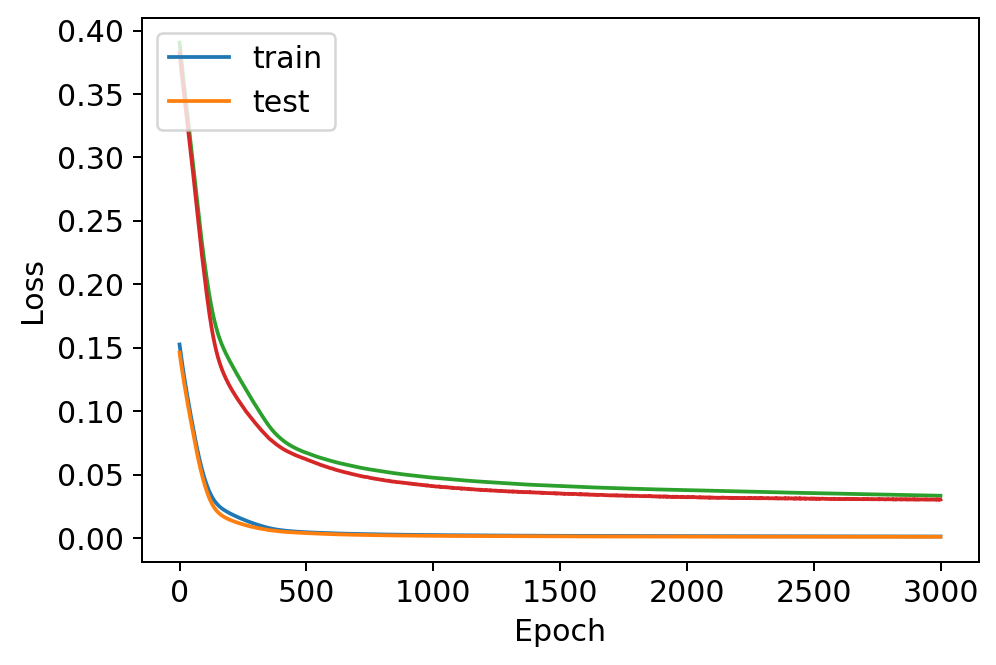

<Figure size 1080x720 with 0 Axes>

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
#plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig("graph.svg")

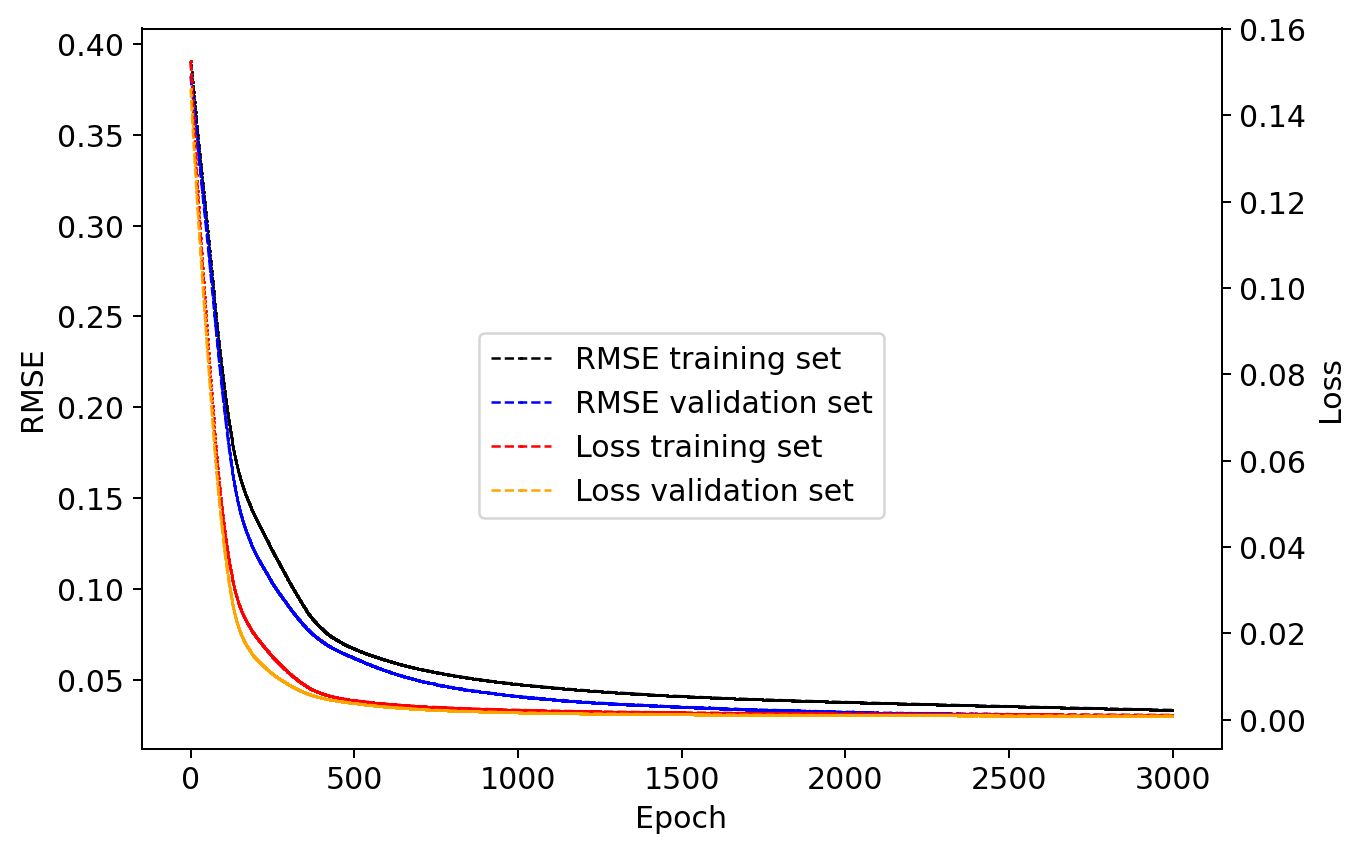

In [24]:
fig = plt.figure()
ax = fig.add_axes((0, 0, 1, 1))

ax2 = plt.twinx(ax)
ax2.plot(loss_metrices['loss'],label = 'Loss training set',color='red', marker='+', linestyle='dashed', linewidth=1, markersize=.5)
ax2.plot(loss_metrices['val_loss'],label = 'Loss validation set',color='orange', marker='+', linestyle='dashed', linewidth=1, markersize=.5)
ax2.set_ylabel('Loss')


ax.plot(loss_metrices['root_mean_squared_error'],label = 'RMSE training set',color='black', marker='+', linestyle='dashed', linewidth=1, markersize=.5)
ax.plot(loss_metrices['val_root_mean_squared_error'],label = 'RMSE validation set',color='blue', marker='+', linestyle='dashed', linewidth=1, markersize=.5)
ax.set_xlabel('Epoch')
ax.set_ylabel('RMSE')


fig.legend(loc='center')
#plt.plot(loss_metrices['root_mean_squared_error'])
plt.grid(False)
plt.savefig("graph.svg")

# Prediction on the test set

In [23]:
y_pred = model.predict(X_test)
y_test1=y_test #just to loot at y_test1 as a DataFrame

In [24]:

y_test1

array([[ 0.65119399,  0.24601325, -0.00679012,  0.03267648,  0.84762584,
         0.8789738 ],
       [ 0.606289  ,  0.46319686,  0.14845679,  0.74806685,  0.47958874,
         0.58423318],
       [ 0.36071064,  0.18672663,  0.03024691,  0.06235969,  0.59826349,
         0.69751944],
       [ 0.16582806,  0.12132299,  0.18487654,  0.4305313 ,  0.23317343,
         0.28097863],
       [ 0.60978465,  0.24032345,  0.08518519,  0.32402095,  0.58237852,
         0.59316243],
       [ 0.45709706,  0.62356007,  0.34320988,  0.94262908,  0.50197571,
         0.66083969],
       [ 0.36665148,  0.24296445,  0.04475309,  0.02619107,  0.81074152,
         0.89447255],
       [ 0.13294599,  0.13285795,  0.3595679 ,  0.87029184,  0.0608968 ,
         0.07783357],
       [ 0.40583633,  0.3795198 ,  0.21296296,  0.95734597,  0.20546062,
         0.28815223],
       [ 0.51945383,  0.15565602,  0.2095679 ,  0.42803692,  0.21138115,
         0.1661255 ],
       [ 0.46157255,  0.21121416,  0.0287037 ,  0.

In [25]:
y_test1=pd.DataFrame(y_test1,columns = ['E1','E3','v12','v23','G12','G23'])
#y_test.head()
y_test1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
E1,100.0,0.445336,0.201384,0.116968,0.295650,0.430531,0.579297,0.947830
E3,100.0,0.242545,0.143412,0.048963,0.140548,0.211224,0.308043,0.718442
v12,100.0,0.173500,0.135794,-0.006790,0.083488,0.148148,0.220988,0.702778
v23,100.0,0.456830,0.258233,0.026191,0.251933,0.429284,0.660763,1.016463
G12,100.0,0.399580,0.205715,0.028215,0.214209,0.409765,0.533703,0.896761
G23,100.0,0.458637,0.233993,0.036925,0.246725,0.480395,0.636945,0.953806


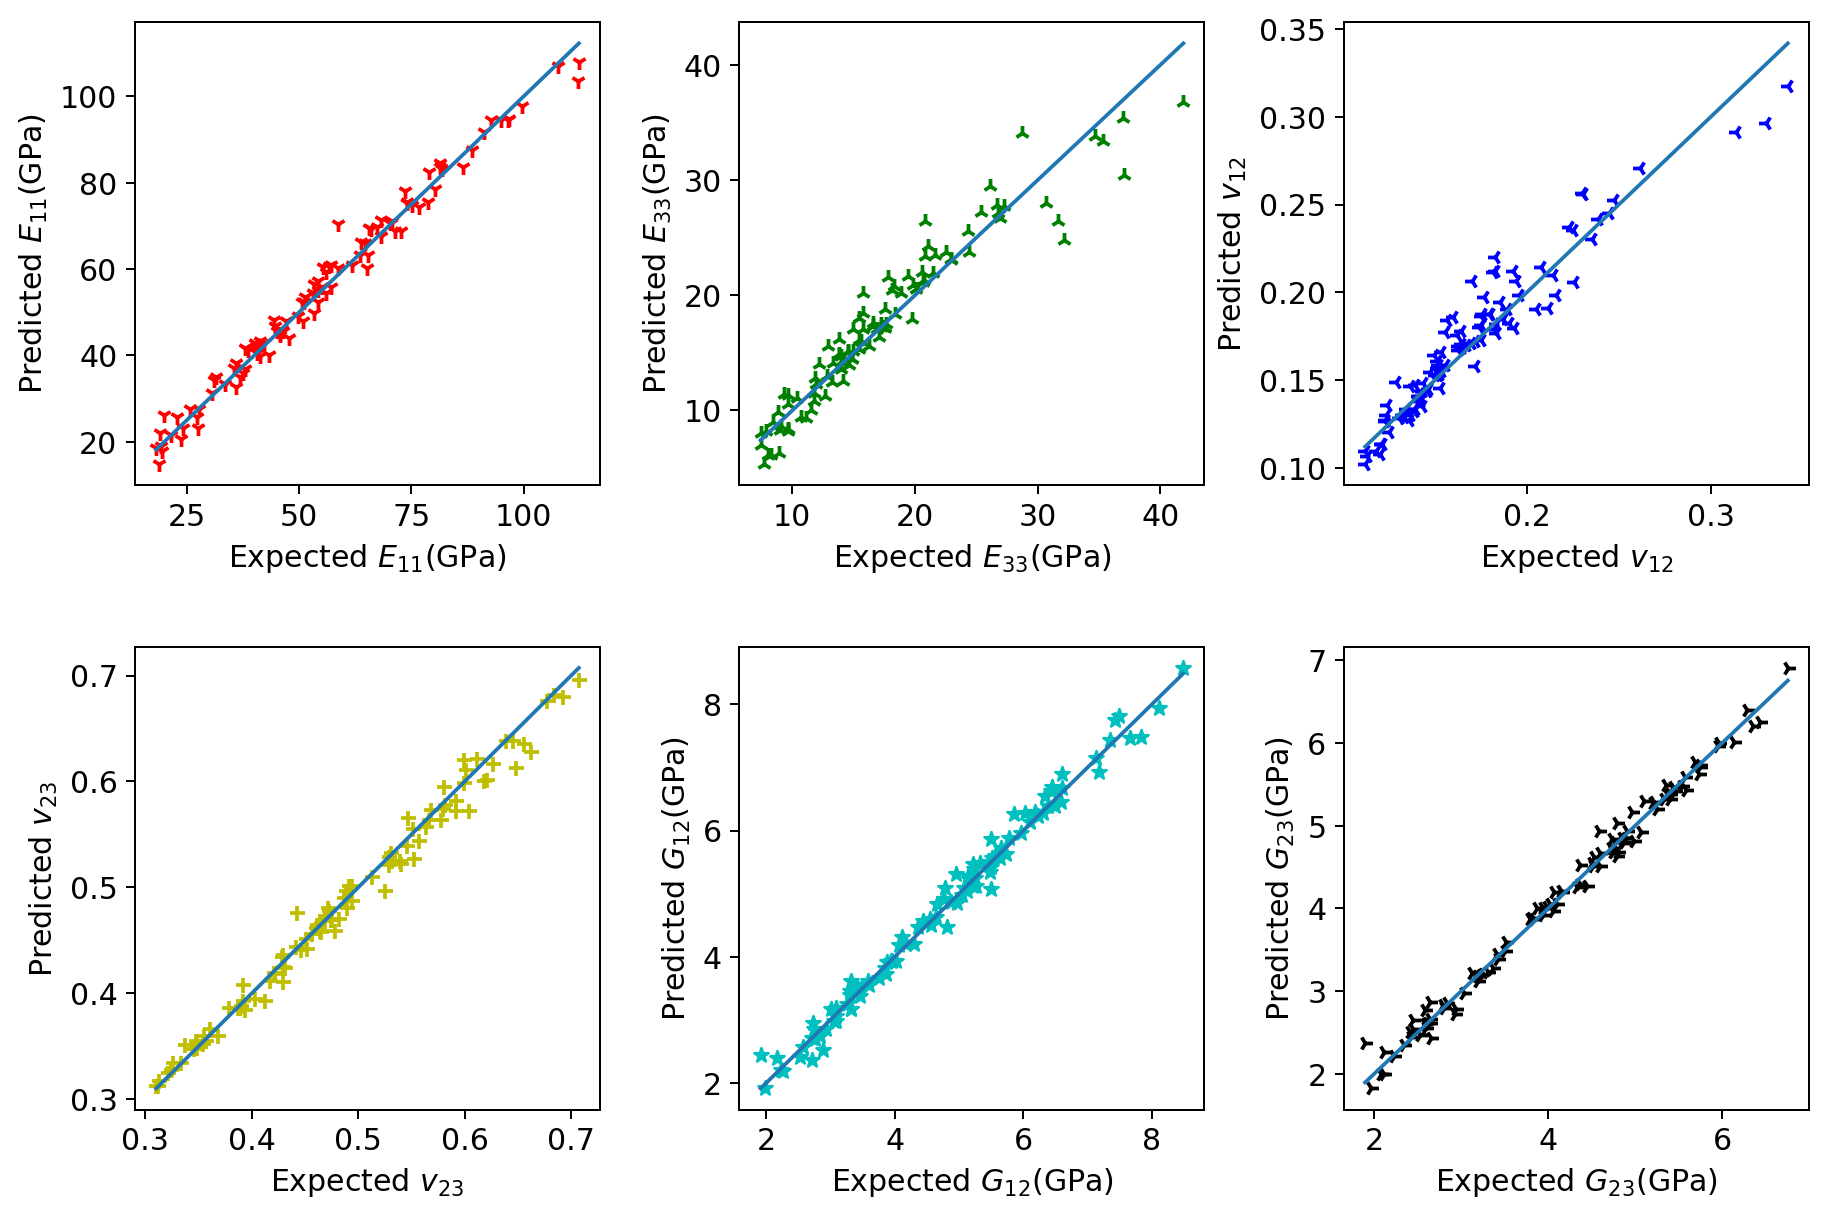

In [26]:
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(12,8))
# ['E1','E3','v12','v23','G12','G23'] 
# Parameters at the axes level

# Apply inverse scaleing
y_test = scaler1.inverse_transform(y_test)
y_pred = scaler1.inverse_transform(y_pred)

axes[0][0].scatter(y_test[:,0]/1e3 , y_pred[:,0]/1e3 , color='r', marker='1')
x00 = 1e-3*np.array([y_test[:,0].min(), y_test[:,0].max()]) # instead of [0,1] as the plot border
y00 = x00
axes[0][0].plot(x00,y00)


axes[0][1].scatter(y_test[:,1]/1e3 , y_pred[:,1]/1e3, color='g', marker='2')
x01= 1e-3*np.array([y_test[:,1].min(), y_test[:,1].max()])
y01=x01
axes[0][1].plot(x01,y01)


axes[0][2].scatter(y_test[:,2] , y_pred[:,2], color='b', marker='3')
x02 = np.array([y_test[:,2].min(),y_test[:,2].max()])
y02 = x02
axes[0][2].plot(x02,y02)



axes[1][0].scatter(y_test[:,3] , y_pred[:,3], color='y', marker='+')
x10 = np.array([y_test[:,3].min(),y_test[:,3].max()])
y10=x10
axes[1][0].plot(x10,y10)


axes[1][1].scatter(y_test[:,4]/1e3, y_pred[:,4]/1e3, color='c', marker='*')
x11 = 1e-3*np.array([y_test[:,4].min(), y_test[:,4].max()])
y11=x11
axes[1][1].plot(x11,y11)
#axes[1][1].ticklabel_format(useOffset=True)

axes[1][2].scatter(y_test[:,5]/1e3 , y_pred[:,5]/1e3, color='black', marker='4')
x12 = 1e-3*np.array([y_test[:,5].min(), y_test[:,5].max()])
y12=x12
axes[1][2].plot(x12,y12)
#_______________________________________
# # ['E1','v12','E3','v13','G12']  Elastic properties of Woven RVE 
axes[0][0].set_xlabel('Expected $E_{11} (\mathrm{GPa})$')
axes[0][1].set_xlabel('Expected $E_{33} (\mathrm{GPa})$')
axes[0][2].set_xlabel('Expected $v_{12}$')
axes[1][0].set_xlabel('Expected $v_{23}$')
axes[1][1].set_xlabel('Expected $G_{12} (\mathrm{GPa})$')
axes[1][2].set_xlabel('Expected $G_{23} (\mathrm{GPa})$')

axes[0][0].set_ylabel('Predicted $E_{11} (\mathrm{GPa})$')
axes[0][1].set_ylabel('Predicted $E_{33} (\mathrm{GPa})$')
axes[0][2].set_ylabel('Predicted $v_{12}$')
axes[1][0].set_ylabel('Predicted $v_{23}$')
axes[1][1].set_ylabel('Predicted $G_{12} (\mathrm{GPa})$')
axes[1][2].set_ylabel('Predicted $G_{23} (\mathrm{GPa})$')

# Use left,right,top, bottom to stretch subplots
# Use wspace,hspace to add spacing between subplots
fig.subplots_adjust(left=None,
    bottom=None,
    right=None,
    top=None,
    wspace=0.3,
    hspace=0.35,)

#______set_title('mesoscale 3D elastic properties. Predicted by ANN vs. FE simulations in Digimat')
#______input data extended from microscale ANN model. initial data set with 400 points and the 
# extended one with 600 data points.
#plt.savefig("woven_RVE_elastic_coef.pdf", format="pdf", bbox_inches="tight")
plt.plot()
plt.show()

In [27]:
plt.savefig("woven_RVE_elastic_coef.pdf", format="pdf", bbox_inches="tight")

<Figure size 1080x720 with 0 Axes>

# Visualizing residuals on the test set
**first check the position of the corresponding output 

Text(0, 0.5, 'Residual percentage[%]')

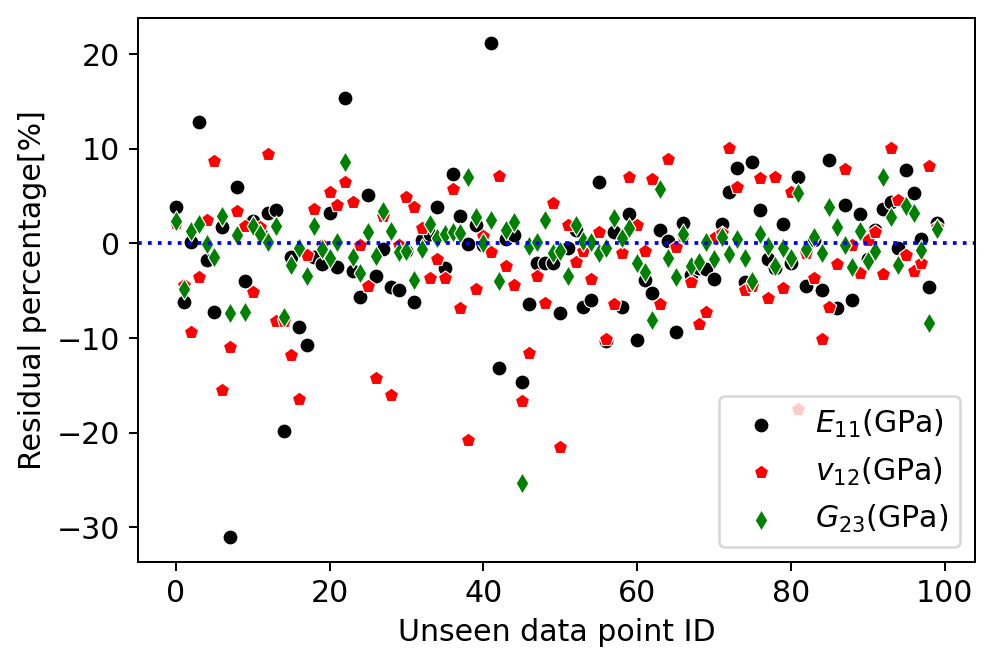

In [28]:
# definition for the residuals: 
residuals = np.zeros([3,y_test[:,0].size])
residuals[0,:] = 100*(y_test[:,0]-y_pred[:,0])/y_test[:,0]
residuals[1,:] = 100*(y_test[:,2]-y_pred[:,2])/y_test[:,2]
residuals[2,:] = 100*(y_test[:,5]-y_pred[:,5])/y_test[:,5]
#____________________________________________
sns.scatterplot(data = residuals[0,:],color='black', marker='o', label='$E_{11} (\mathrm{GPa})$')
sns.scatterplot(data = residuals[1,:],color='red', marker='p', label='$v_{12} (\mathrm{GPa})$')
sns.scatterplot(data = residuals[2,:],color='green', marker='d', label='$G_{23} (\mathrm{GPa})$')
plt.axhline(y=0, color='b', linestyle=':')
#plt.title('Residual of test data')
plt.xlabel('Unseen data point ID')
plt.ylabel('Residual percentage[%]')

# 